In [53]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import classes.database as db
import seaborn as sns
import scipy.stats as stats


#connect to database and retrieve data
db.connect()

df = pd.DataFrame()
df = db.getMovieData("movies_full")

db.shutdown()

Data downloaded
PostgreSQL connection is closed


In [54]:
df.head()
df.shape

(140400, 17)

In [55]:
#remove movies with less than 1000 votes and budget less than 50000
df = df.loc[df['vote_count'] >= 1000]
df['budget'] = df['budget'].apply(lambda x: np.nan if x <= 50000 else x)

df = df.dropna(subset=['budget']).reset_index(drop=True)

Text(0.5, 1.0, 'Budget vs Ratings')

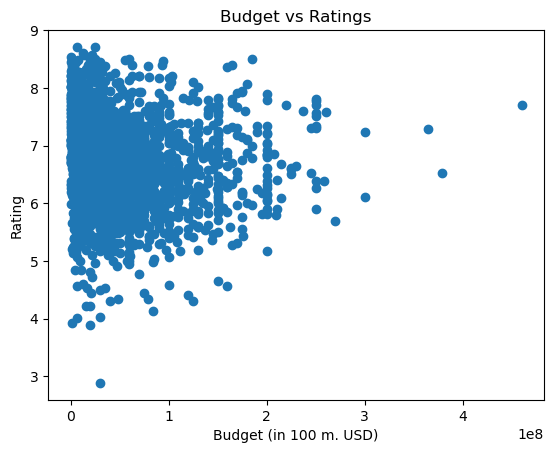

In [56]:
plt.scatter(df['budget'], df['vote_average'])

plt.xlabel('Budget (in 100 m. USD)')
plt.ylabel('Rating')
plt.title('Budget vs Ratings')


Text(0, 0.5, 'Number of Movies')

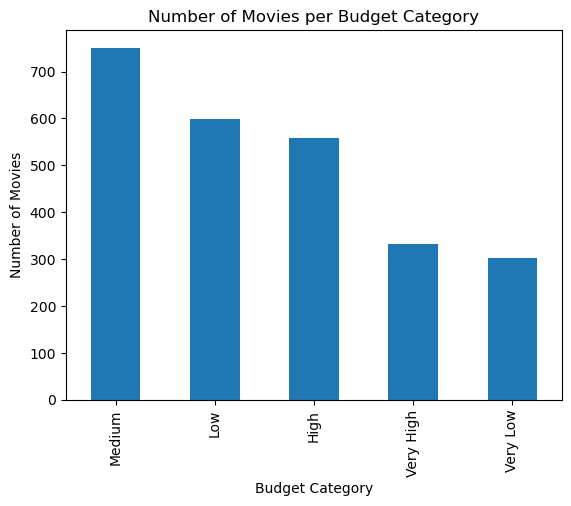

In [57]:
#breaking up the budget into categories
budget_ranges = [50000, 5000000, 20000000, 50000000, 100000000, float('inf')]
category_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['budget_category'] = pd.cut(df['budget'], bins=budget_ranges, labels=category_names, right=False)

df['budget_category'].value_counts().plot(kind='bar')

plt.title('Number of Movies per Budget Category')
plt.xlabel('Budget Category')
plt.ylabel('Number of Movies')

In [58]:
#figure out the avaragae rating for each budget category

print(df.groupby('budget_category')['vote_average'].mean())

budget_category
Very Low     7.266480
Low          6.918504
Medium       6.656889
High         6.528172
Very High    6.622381
Name: vote_average, dtype: float64


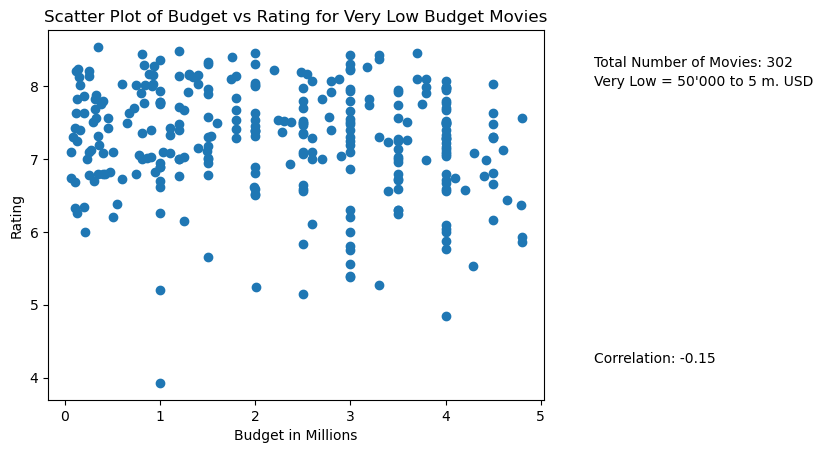

In [79]:
verylow_budget_movies = df[df['budget_category'] == 'Very Low']

#t-test to see if there is a significant difference between the ratings of very low budget movies and the rest of the movies
t_statistic, p_value_ttest = stats.ttest_ind(verylow_budget_movies['budget'], verylow_budget_movies['vote_average'])

# Define x and y
x = verylow_budget_movies['budget']
y = verylow_budget_movies['vote_average']

# Pearson correlation coefficient
correlation_coef, p_value_pearson = stats.pearsonr(x, y)


plt.scatter(verylow_budget_movies['budget'], verylow_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Rating')
plt.title('Scatter Plot of Budget vs Rating for Very Low Budget Movies')

plt.xticks([0, 1000000, 2000000, 3000000, 4000000, 5000000], ['0', '1', '2', '3', '4','5'])
total_movies = len(verylow_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)
plt.text(1.1, 0.85, f'Very Low = 50\'000 to 5 m. USD', transform=plt.gca().transAxes)

plt.text(1.1, 0.1, f'Correlation: {correlation_coef:.2f}', transform=plt.gca().transAxes)

plt.show()

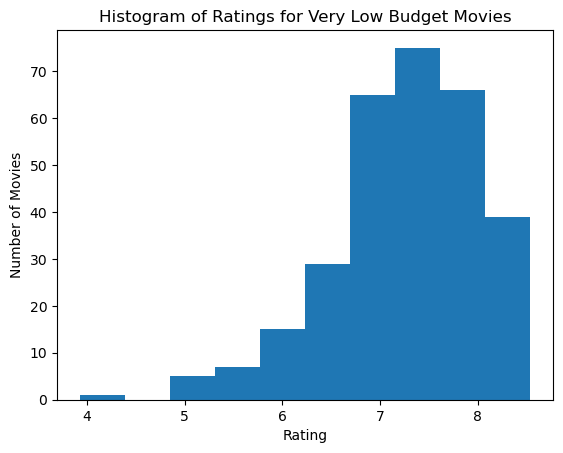

In [60]:
#Histogram of ratings for very low budget movies 
plt.hist(verylow_budget_movies['vote_average'], bins=10)
plt.ylabel('Number of Movies')
plt.xlabel('Rating')
plt.title('Histogram of Ratings for Very Low Budget Movies')

total_movies = len(verylow_budget_movies)

plt.show()

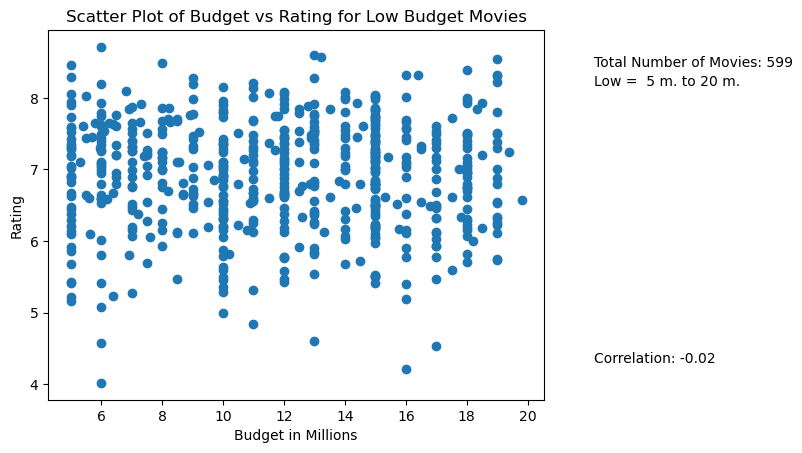

In [80]:
low_budget_movies = df[df['budget_category'] == 'Low']

#t-test to see if there is a significant difference between the budget and rating
t_statistic, p_value_ttest = stats.ttest_ind(low_budget_movies['budget'], low_budget_movies['vote_average'])

# Define x and y
x = low_budget_movies['budget']
y = low_budget_movies['vote_average']

# Pearson correlation coefficient
correlation_coef, p_value_pearson = stats.pearsonr(x, y)

plt.scatter(low_budget_movies['budget'], low_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Rating')
plt.title('Scatter Plot of Budget vs Rating for Low Budget Movies')

#set x-axis ticks to be in millions
plt.xticks([6000000, 8000000, 10000000,12000000, 14000000,16000000, 18000000, 20000000], ['6', '8', '10', '12', '14','16', '18', '20'])
total_movies = len(low_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)
plt.text(1.1, 0.85, f'Low =  5 m. to 20 m.', transform=plt.gca().transAxes)

plt.text(1.1, 0.1, f'Correlation: {correlation_coef:.2f}', transform=plt.gca().transAxes)


plt.show()

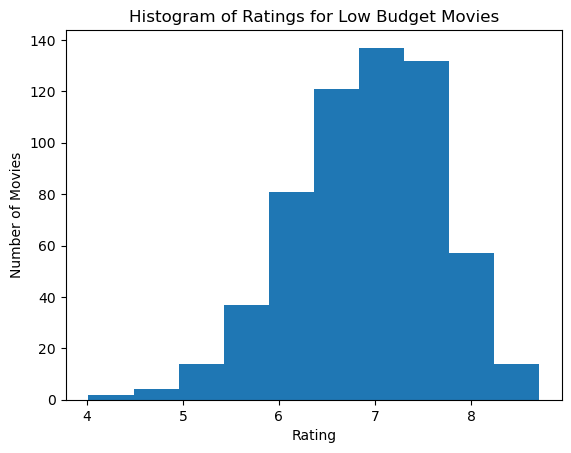

In [62]:
#Histogram of ratings for low budget movies 
plt.hist(low_budget_movies['vote_average'], bins=10)
plt.ylabel('Number of Movies')
plt.xlabel('Rating')
plt.title('Histogram of Ratings for Low Budget Movies')

total_movies = len(low_budget_movies)

plt.show()

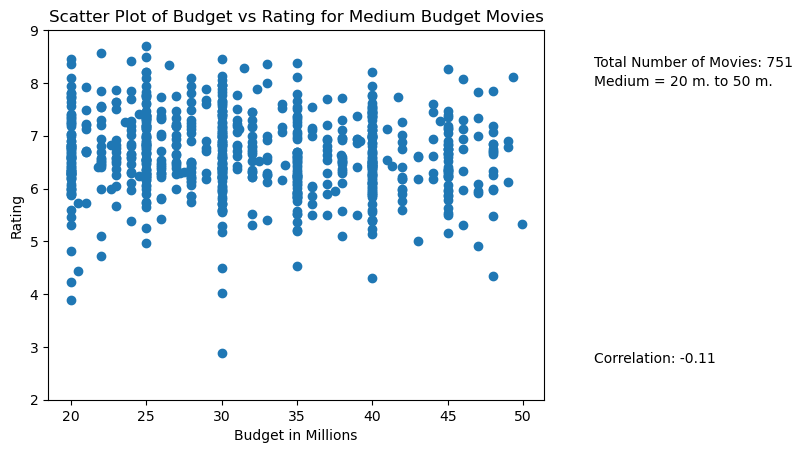

In [81]:
medium_budget_movies = df[df['budget_category'] == 'Medium']

#t-test to see if there is a significant difference between the budget and rating
t_statistic, p_value_ttest = stats.ttest_ind(medium_budget_movies['budget'], medium_budget_movies['vote_average'])

# Define x and y
x = medium_budget_movies['budget']
y = medium_budget_movies['vote_average']

# Pearson correlation coefficient
correlation_coef, p_value_pearson = stats.pearsonr(x, y)


plt.scatter(medium_budget_movies['budget'], medium_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Rating')
plt.title('Scatter Plot of Budget vs Rating for Medium Budget Movies')

plt.xticks([20000000, 25000000, 30000000, 35000000, 40000000, 45000000, 50000000], ['20', '25', '30', '35', '40','45', '50'])
plt.ylim(2, 9)
total_movies = len(medium_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)
plt.text(1.1, 0.85, f'Medium = 20 m. to 50 m.', transform=plt.gca().transAxes)

plt.text(1.1, 0.1, f'Correlation: {correlation_coef:.2f}', transform=plt.gca().transAxes)


plt.show()

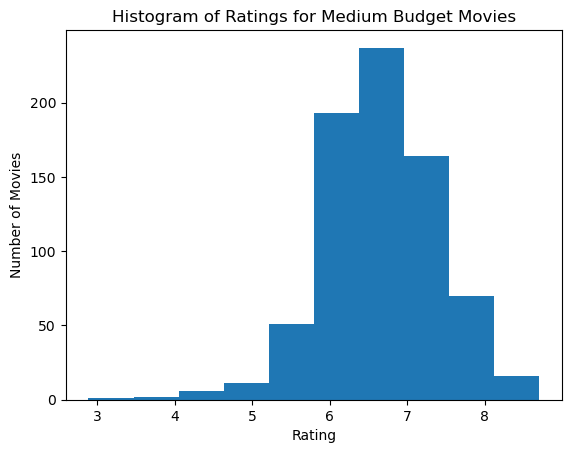

In [64]:
#Histogram of ratings for medium budget movies 
plt.hist(medium_budget_movies['vote_average'], bins=10)
plt.ylabel('Number of Movies')
plt.xlabel('Rating')
plt.title('Histogram of Ratings for Medium Budget Movies')

total_movies = len(medium_budget_movies)

plt.show()

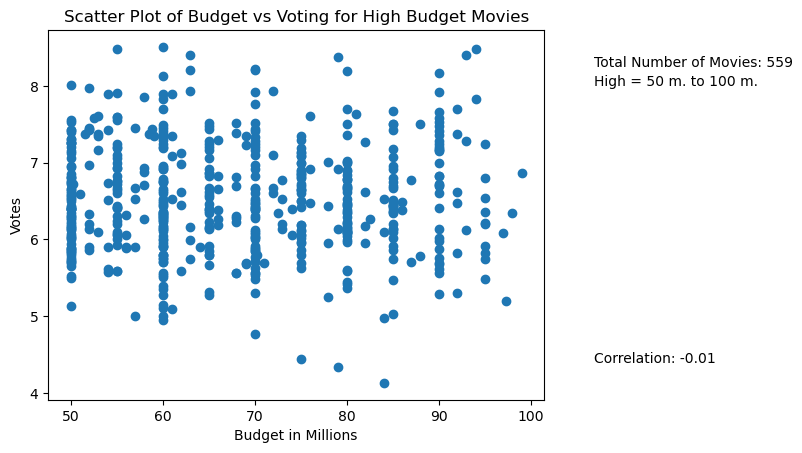

In [82]:
high_budget_movies = df[df['budget_category'] == 'High']

#t-test to see if there is a significant difference between the budget and rating
t_statistic, p_value_ttest = stats.ttest_ind(high_budget_movies['budget'], high_budget_movies['vote_average'])

# Define x and y
x = high_budget_movies['budget']
y = high_budget_movies['vote_average']

# Pearson correlation coefficient
correlation_coef, p_value_pearson = stats.pearsonr(x, y)

plt.scatter(high_budget_movies['budget'], high_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Votes')
plt.title('Scatter Plot of Budget vs Voting for High Budget Movies')

plt.xticks([50000000, 60000000, 70000000, 80000000, 90000000, 100000000], ['50', '60', '70', '80', '90','100'])

total_movies = len(high_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)
plt.text(1.1, 0.85, f'High = 50 m. to 100 m.', transform=plt.gca().transAxes)

plt.text(1.1, 0.1, f'Correlation: {correlation_coef:.2f}', transform=plt.gca().transAxes)

plt.show()

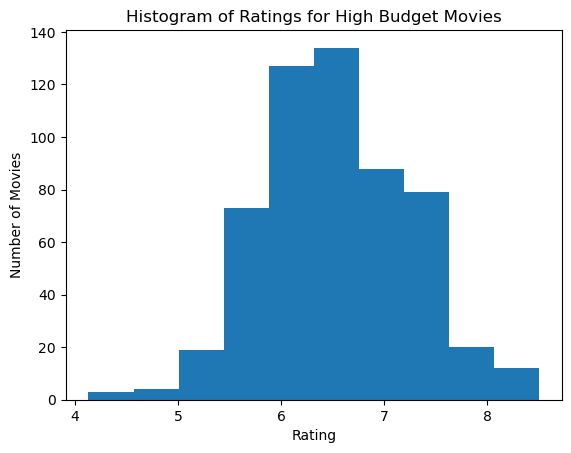

In [66]:
#Histogram of ratings for high budget movies 
plt.hist(high_budget_movies['vote_average'], bins=10)
plt.ylabel('Number of Movies')
plt.xlabel('Rating')
plt.title('Histogram of Ratings for High Budget Movies')

total_movies = len(high_budget_movies)

plt.show()

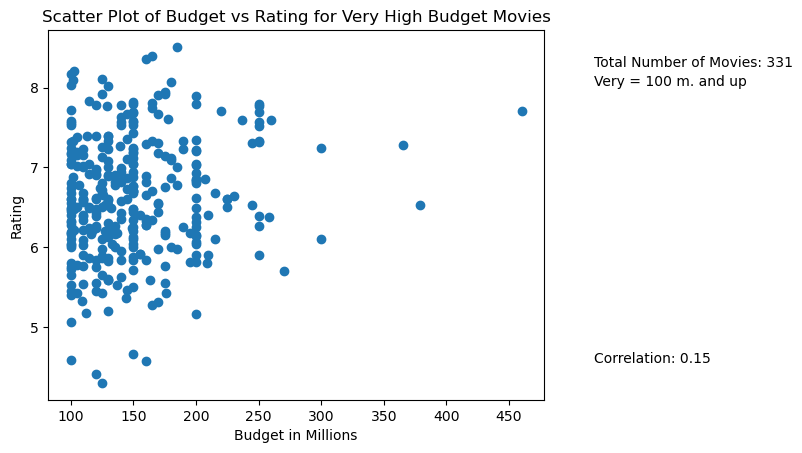

In [84]:
veryhigh_budget_movies = df[df['budget_category'] == 'Very High']

#t-test to see if there is a significant difference between the budget and rating
t_statistic, p_value_ttest = stats.ttest_ind(veryhigh_budget_movies['budget'], veryhigh_budget_movies['vote_average'])

# Define x and y
x = veryhigh_budget_movies['budget']
y = veryhigh_budget_movies['vote_average']

# Pearson correlation coefficient
correlation_coef, p_value_pearson = stats.pearsonr(x, y)

plt.scatter(veryhigh_budget_movies['budget'], veryhigh_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Rating')
plt.title('Scatter Plot of Budget vs Rating for Very High Budget Movies')

plt.xticks([100000000, 150000000, 200000000, 250000000, 300000000, 350000000, 400000000, 450000000], ['100', '150', '200', '250', '300','350', '400', '450'])



total_movies = len(veryhigh_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)
plt.text(1.1, 0.85, f'Very = 100 m. and up', transform=plt.gca().transAxes)

plt.text(1.1, 0.1, f'Correlation: {correlation_coef:.2f}', transform=plt.gca().transAxes)


plt.show()

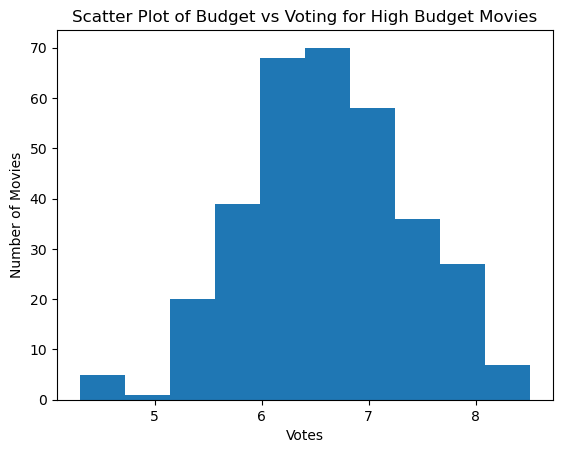

In [68]:
plt.hist(veryhigh_budget_movies['vote_average'], bins=10)
plt.ylabel('Number of Movies')
plt.xlabel('Votes')
plt.title('Scatter Plot of Budget vs Voting for High Budget Movies')

total_movies = len(veryhigh_budget_movies)